In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import json 
import ctypes 
import tifffile 

from scipy import ndimage as nd
from scipy.ndimage import distance_transform_edt

import pypore3d 
from pypore3d import *
from pypore3d.p3dFiltPy import *
from pypore3d.p3dBlobPy import *
from pypore3d.p3dSkelPy import *
from pypore3d.p3dSITKPy import *


from glob import glob 
from tqdm import tqdm 

from poreUtils import *

In [2]:
data_dir = 'D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm\\result\\'
#data_dir = 'D:\\sagar\\Data\\MD_1264_A18\\'
# roi specification 
x, y, z = 300, 300, 300
res = 0.002 # 2 micron 

rois = glob(data_dir + '*.raw')

In [3]:
# reading only one roi 
for roi in tqdm(rois[0:1]):
    result = {}
    # Reading the file 
    volc = py_p3dReadRaw8(roi, x, y, z)
    # Appying Median filter for removing noise
    volc = py_p3dMedianFilter8(volc, x, y, z, width=3)
    # convert it to numpy array for manual thresholding and a bit processing which are easy in numpy array
    vol = swigObjt2uint8Array(volc, x, y, z)
    th_vol = vol < 55 
    th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
    # From binary to 0-255
    th_vol = norm8bit(th_vol, 0, 1)
    # Converting back to py_p3d data format to be able to use the functionality 
    th_vol.tofile('th_vol.raw')
    th_volc = py_p3dReadRaw8('th_vol.raw', x, y, z)
    #os.remove('th_vol.raw')
    
    # Blob Analysis 
    blob_stats, blob_im, star_im = py_p3dBlobAnalysis(th_volc, x, y, z, resolution=res)
    blob_analysis = formatBlobStats(blob_stats, definition=True)
    result['blob_analysis'] = blob_analysis

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.12s/it]


In [4]:
roi

'D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm\\result\\1000-1300x1000-1300x2000-2300_8bit.raw'

In [14]:
th_roi = vol > 40
th_roi = nd.binary_closing(th_roi, np.ones((3,3,3)))
dis3d = distance_transform_edt(th_roi)
dis3d[dis3d < 4] = np.nan

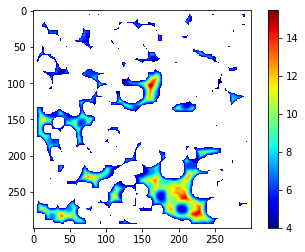

In [18]:
fig = plt.figure()
plt.imshow(dis3d[150, :, :], cmap='jet')
#plt.plot(150, 15, 'oc', markersize=200, alpha=0.5, )
#plt.plot(150, 15, 'ok', markersize=5, alpha=1, )
#plt.text(150, 150, 'this is the center')
plt.colorbar()
plt.savefig('dt.pdf')
plt.show()

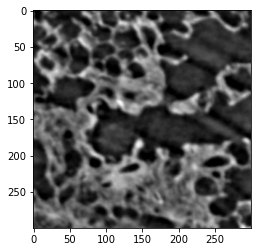

In [20]:
fig = plt.figure()
plt.imshow(vol[150, :, :], cmap='gray')
plt.savefig('vol_slice_to_dt.pdf')
plt.show()